## 설명해주신 것에 더해 주석달기
# 딥러닝 강의 - softmax classification과 cnn 

In [2]:
import tensorflow as tf
import random


from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [3]:
#tensorflow에서 기본적으로 제공하는 mnist데이터를 받아옵니다. 
#이 데이터는 사진(28*28*1)으로, 흰색 배경에 검은색으로 0~9까지 숫자가 필기체로 적혀있습니다. 
#이때 이 사진에 어떤 수가 적혀있는 것인지 맞추게 하는 것이 이번 딥러닝 예제의 목표입니다..!
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

# softmax classification-basic NN

### 텐서플로우 노드를 만들어봅시다.

In [5]:

#이때 placeholder는 나중에 데이터를 넣을 수 있는 '통' 같은 개념 
#tensorflow는 line by line으로 실행값이 나오는게 아니라 그래프/메카니즘을 먼저 만든다음 값을 넣는다.

#이 작업은 현재 그래프를 그리는 작업.
x=tf.placeholder(tf.float32,[None,784],name='x') #미리 [None, 784] 모양읱 통을 그린 것.
y=tf.placeholder(tf.float32,[None,10],name='y')
    
#여기서 784라는 숫자는 사진이 28*28*1이기 때문에 한 사진당 총 픽셀이 28의 제곱인 784개 들어있기 떄문에 사용합니다. 
#마지막에 곱해진 1은 흑백이기 때문에. 컬러면 *3 (rgb)
#즉 softmax classification 방법은 데이터를 일렬로 쭉 펴서 저장해두는 방식을 사용합니다.


### 가설함수 H(x)=Wx+b를 만들어 봅시다. 

In [6]:
#우리가 글로 적을 때는 Wx+b라 적지만 실제 코딩을 할떄는 xW+b와 같은 형태임
#x가 n*784, W가 784*28 b가 n*28이고 따라서 layer1은 n*28이 될 것입니다.

#여러 층 중에 1층. 
with tf.name_scope("layer1"): 
    W1=tf.Variable(tf.random_normal([784,28]),name='weight1') 
    b1=tf.Variable(tf.random_normal([28]),name='bias1') 
    #여기 28이 나오게 된 배경은 전체 구조가 2층이고, 
    #784를 28로 바꾸고 그 다음 28을 10으로 바꾸는 작업을 두 층에 걸쳐서 하는 것.
   

    layer1=tf.sigmoid(tf.matmul(x,W1)+b1)
    # W1x+ b1 이라는 걸 그린 것.
    # sigmoid는 똑같은 작업을 -무한대~+무한대를 압축해주는 용도로 사용. 
    # ppt 37: 0~1 사이의 값으로. 뒷 처리를 쉽게 하기 위해 가설 함수 모양 H(x)를 잠깐 바꾼거다.
    
    
    #summary.histogram은 tensorboard에서 표를 그릴때 사용하는 것으로 
    #나중에 tensorboard를 배우고 싶으신 분들이 있을까봐 참고용으로 지우지 않고 넣어두었습니다. 
    #w1_hist=tf.summary.histogram("weighth1",W1)
    #b1_hist=tf.summary.histogram("biash1",b1)
    #layer1_hist=tf.summary.histogram("layer1",layer1)

#2층
with tf.name_scope("layer2"):
    W2=tf.Variable(tf.random_normal([28,10]),name='weight2')
    b2=tf.Variable(tf.random_normal([10]),name='bias2')
    
    #logits는 Wx+b로 우리가 W,b를 조절하며 계산,예측한 값을 의미합니다. 
    logits=tf.matmul(layer1,W2)+b2
    hypo=tf.nn.softmax(logits) 
    #위에서는 tf.sigmoid 였는데 여기는 softmax임 
    #ppt.39 참고 - softmax의 특징은 값 다 더했을떄 1 나오게. 
    #예)cat 점수 2, dog 점수 1 말고 cat 점수 0.7 dog 점수 0.2 이런식으로 확률화. 더 처리 편함
    #현재 layer1에서는 sigmoid, layer2-softmax. 왜
    #ppt 43. softmax, sigmoid 둘다 0~1 만드는데 차이점? 
    #softmax는 분류를 해주니까 마지막 output 노드에 사용함. 또 softmax는 다른 값과 연동이 된다. 2.0가 들어가면 무조건 0.7이 나오는게 아니라 주변 숫자 바뀌면 2.0 입력값이 0.7 말고 다르게 바뀌는 식으로 연동됨.
    #반면 sigmoid는 정해진 함수니까 정해진x대입시 똑같은 값이 나온다.
   
    #w2_hist=tf.summary.histogram("weighth2",W2)
    #b2_hist=tf.summary.histogram("biash2",b2)
    #logits_hist=tf.summary.histogram("logits",logits)
    

## cost함수 만들기

In [ ]:
#ppt 45. 코스트함수 : Cross-entropy function
#왼쪽) S(Y)는 예측값. 오른쪽은 인코딩한 것: 1.0 고양이, 0,0 개 이런식으로 
#ppt 46. [0,1]을 [0,1]로 맞게 예측하면 cost가 0으로 나오고, 반대로 틀리게 예측시에 cost를 매우 높게.
#즉 크로스 엔트로피 함수는 실제와 예측 일치할떄 코스트를 0으로 만들고 반대로 예측과 실체 다르면 코스트틀 매우 크게 하는 것.

In [7]:
with tf.name_scope("cost"):
    cost=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y)
    #cost_sum=tf.summary.scalar("cost",cost)

### cost를 줄이는 optimizer로 우리가 잘 아는 경사하강법(gradient descent)을 사용합니다.

In [8]:
#p.49 경사하강법. cost를 줄이기 위해 '가중치'를 줄이는 작업을 반복하는 것. 곧 W를 조절하는것.
#이런식으로 tensorflow는 그래프를 미리 그리고 시작
with tf.name_scope("train"):
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

### 우리가 만든 가설함수의 정확성을 확인하기 위한 코드입니다.

In [10]:
#p.51 tf.argmax(a,0): 각열에서 가장 큰 숫자의 인덱스
#tf.argmax(a,1): 각행에서 가장 큰 숫자의 인덱스 
#즉 아래에서는 tf.argmax통해 각 행에서 최댓값을 뽑아낸다. 지금 하는건 예측값 중 가장 큰 값을 가져오는 거니까

prediction=tf.argmax(hypo,axis=1)

is_correct=tf.equal(prediction,tf.argmax(y,1))
#여기서 주의할 점은 뒤에 실행 코드를 보시면 아시겠지만 이 x,y에는 train이 아닌 test데이터를 집어넣습니다.  
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))
#accuracy_sum=tf.summary.scalar("accuracy",accuracy)

#### 지금까지는 가설함수와 층을 만들고, 코스트를 줄이는 방식(여기서는 경사하강법)을 정하는 등 
#### 텐서플로우 상에서 'graph를 그린 것'입니다. 
#### 이제부터 할 것은 실제로 그 안에서 가설함수의 코스트를 줄이는 방향으로 학습을 진행하라는 코드를 볼 것입니다.  

Accuracy 0.8643
Label:  [7]
Prediction:  [7]


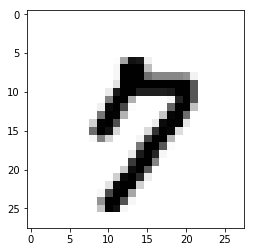

Accuracy 0.893
Label:  [0]
Prediction:  [0]


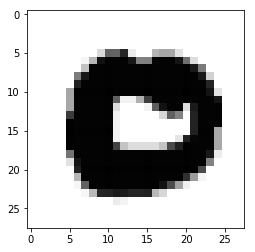

Accuracy 0.9023
Label:  [7]
Prediction:  [2]


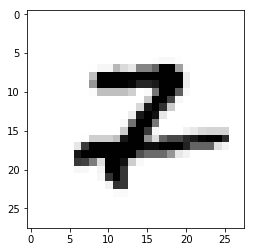

Accuracy 0.907
Label:  [1]
Prediction:  [1]


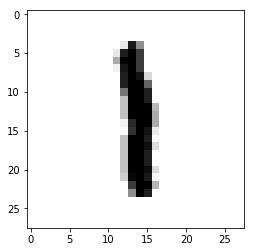

Accuracy 0.91
Label:  [3]
Prediction:  [3]


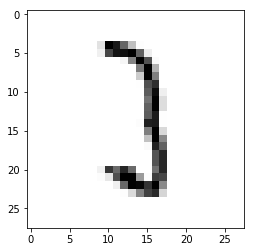

Accuracy 0.9178
Label:  [9]
Prediction:  [9]


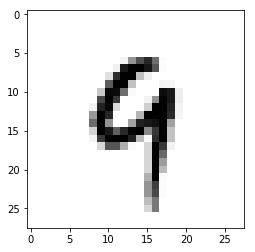

Accuracy 0.919
Label:  [3]
Prediction:  [3]


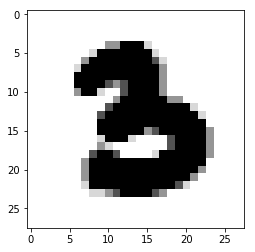

Accuracy 0.9221
Label:  [8]
Prediction:  [8]


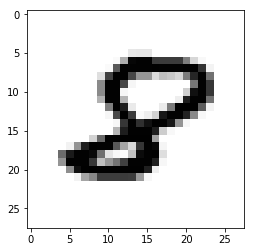

Accuracy 0.925
Label:  [2]
Prediction:  [2]


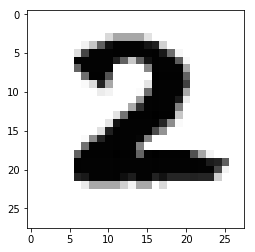

Accuracy 0.9277
Label:  [2]
Prediction:  [2]


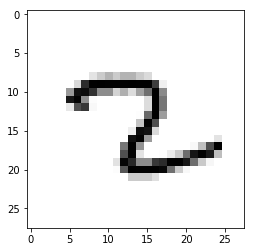

Accuracy 0.9297
Label:  [6]
Prediction:  [6]


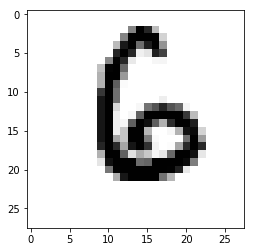

Accuracy 0.9311
Label:  [4]
Prediction:  [4]


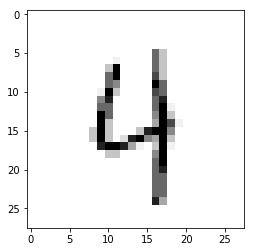

Accuracy 0.932
Label:  [1]
Prediction:  [1]


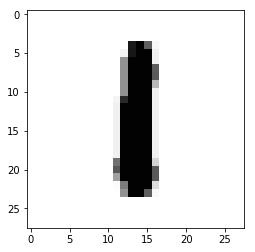

Accuracy 0.9319
Label:  [2]
Prediction:  [2]


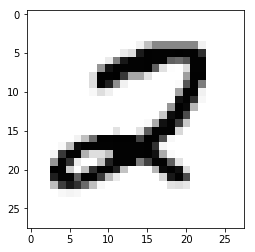

Accuracy 0.9331
Label:  [1]
Prediction:  [1]


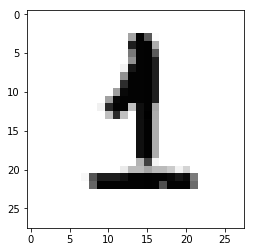

In [11]:
with tf.Session() as sess:
    #이는 sess=tf.Session()과 같은 의미로 계산 과정을 시작하자는 시동을 거는 것입니다. 
    
    #parameters로 iter_epoch는 전체 학습 반복 횟수, batch_size는 한번에 읽어들여서 학습시키는 양
    #batch_size는 왜 필요할까요?
    iter_epoch=15 #epoch는 반복해서 돌아가는 횟수. 여러번 넣음 되고
    batch_size=100 #한번에 하나씩 or 모든자료 들어가면 너무 오래걸리거나 과부하. 한번에 들어가는 자료를 100 정도로 적당히 정해서 조금씩 넣어주는 것.
    
    
    #global_step=0
    #merged=tf.summary.merge([accuracy_sum,cost_sum])
    #writer=tf.summary.FileWriter('c:\\GH\\tensor')
    #writer.add_graph(sess.graph)
    #valid_x=mnist.validation.images
    #valid_y=mnist.validation.labels
    
    
    #전역 변수 initializer을 사용하여 우리가 만든 W등의 초기화를 미리 지정한 방식(이 경우 random_normal)으로 초기화해줍니다. 
    sess.run(tf.global_variables_initializer())
    
    
    
    for epoch in range(iter_epoch):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size)
        #total_batch는 전체 train 데이터 개수를 미리 설정한 batch_size(이 경우 100)으로 나눈 값으로 
        #전체 train을 1번 완료 하려면 batch를 100개씩 넣는 작업을 몇번 반복해야하는 것인지를 뜻합니다 
        
        for i in range(total_batch):
            
            batch_x,batch_y=mnist.train.next_batch(batch_size)
            #train.next_batch는 다음 batch만큼의 데이터를 가져와서 batch_x,batch_y에 넣습니다.
            #이때 물론 batch_y는 각각의 사진의 실제 답,label입니다. 
            
            #cost함수를 다시 올라가면서 보면 logits에 x가,label에 y가 들어가있다. 
            #즉 cost에 x,y넣으면 바로 결과 구할 수 있음
            c,s,_=sess.run([cost,accuracy,optimizer],feed_dict={x:batch_x,y:batch_y})
            #cost, accuracy_sum에 batch만큼의 데이터를 집어넣어 줍니다. 이때 동시에 optimzer에도 넣어 cost를 줄여주는 학습을 진행합니다.
            #optimzer가 나타내는 값 자체는 중요하지 않기 때문에 _ 변수에 저장해주고 이런 _변수는 보통 활용하지 않을 변수에 사용합니다. 
            #참고로 정확성은 할 수록 조금 더 올라가는거 같기는 하지만 컴퓨터마다, 또 할때마다 올라가는 것도 다르다고 함.
            
            avg_cost+=c/total_batch
            #평균 비용은 각 cost를 반복횟수인 train_batch로 나누어서 구합니다.
            
            
            #s=sess.run(merged,feed_dict={x:valid_x,y:valid_y})  
            #writer.add_summary(s,global_step)  
            #global_step+=1
      
       # print('Epoch:','%d' %(epoch+1), 'cost=','{0}'.format(avg_cost))
        print("Accuracy",accuracy.eval(session=sess,feed_dict={x:mnist.test.images,y:mnist.test.labels}))
        
        r = random.randint(0, mnist.test.num_examples - 1)
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        print("Prediction: ", sess.run(
            tf.argmax(logits, 1), feed_dict={x: mnist.test.images[r:r + 1]}))

        plt.imshow(mnist.test.images[r:r + 1].
                   reshape(28, 28), cmap='Greys', interpolation='nearest')
        plt.show()

# CNN
## CNN 활용 볼 수 있는 예제. 사진들을 10가지 라벨로 
## https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html
#### CNN 용도는 한정적이기는 함

In [12]:
tf.set_random_seed(777)  # reproducibility를 위해 지정 

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


In [13]:
# dropout (keep_prob) rate  0.7~0.5 가 train시 권장되고 test 시에는 1을 사용해야합니다.이 부분 뒤에서 ppt랑 같이 
keep_prob = tf.placeholder(tf.float32)


### CNN 기본 노드들을 만들어봅시다

In [14]:
#softmax 코드 부분과 다른점이 뭘까요..!?
#사진 모양을 그대로 유지하기 위해서 X_img = tf.reshape 라는 코드가 한 줄 더 있음. -1 이 있는건 네가 알아서 조정해라.

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (흑백 사진이기에, 컬러였으면 RGB로 28*28*3 이었을 것입니다)
Y = tf.placeholder(tf.float32, [None, 10])


#### cnn 필터들과 다층 layer를 만들어봅시다

In [15]:
#ppt 58. 여기는 층 3개 레이어 
#CNN은 필터를 만든다. 필터를 사진에 적용하면 사진에서 하나의 값을 얻을 수 있게끔. filter 하나하나가 앞에서 본 weight 행렬 같은 존재
#weight 행렬 값은 걸로 사진에서 쭈르륵 사진을 가져온거
#p.62 한칸씩 움직이게, 두칸씩 움직이게 할 수도 있음. 그런데 그럴 경우 output 값이 줄어듬.

# L1 ImgIn shape=(?, 28, 28, 1)
#필터의 개별 크기는 [3,3,1(이는 흑백이어서,컬러면 3)]인 것이고 필터의 총 개수가 32개인것입니다. 
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME') 
#1 1 1 1  첫번째, 마지막 1은 관습적으로 쓰고. 그 사이에 1,1이 움직이는 간격 =즉 1칸씩 움직이게

L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME') #stride 2,2 2칸씩 움직여라. output size 공식도 참고
#padding=Same, 이부분은 7*7에서 5*5로 결과값이 줄어든다. 그런데 이런식으로 하면 1*1로 소멸.. 그래서 도입된게 패딩. 0값을 주위에 둘러준다
#그럼 독같이 3*3 필터링 해도 결과값이 처음 이미지 크기랑 똑같이 7*7이 나온다.
#padding을 왜 하나 1.컴퓨터에게 이게 모서리라는걸 인식하게 해준다. 2.output 크기 줄어드는 것 막아준다.

L1 = tf.nn.dropout(L1, keep_prob=keep_prob) 
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''
#이런 맵을 하나만이 아니라 filter를 여러개로 또 만들고 또 만들고. 여러 개를 쌓을 수 있다. 보통 그렇게 여러 개 쌓아서 한다.


# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))

#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2) 
#(ppt 79~참고) relu는 뭐냐면. 위에서 sigmoid는 0~1 값 내주는데 relu는 0이하 값은 다 0, 그 이상은 입력값 그대로
#왜 사용함? (p.81) CNN 층 깊게 하는데, 가중치를 조절하는 방법이 뒤에서부터 거꾸로 오면서 하는 역전파 방법 > 깊이 깊어질 수록 앞 노드들 영향력 매우 줄어듬
#이를 조금이라도 방지하고자 큰 입력값 들어오면 큰 값을 뒤로 보내게 하자.
#참고로 CNN neural network는 사실 먼저 다 계획해서 성능향상이 되었다기보다는 귀납적으로, 시도하다가 성능 향상 되는 경우들 있는 듯함.

L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
#max_pool. 아까 앞에서는 filter로 뽑아서 activation맵이 p.83처럼 나왔다고 하면 이때 맵의 값 다 받는게 아니라 핵심, 중요한 것만 받아서 뒤로 넘기는거.
#너무 컴퓨팅 작업도 많이 드니까 6 8 3 4 만 받는다.
#max pooling을 하면 activation filter에서 중요한 애만 핵심 간추려서 나옴. 
#풀링에도 가장 큰것 뽑기, 작은것 뽑기 등 여러 방법이 있는데 이게 실증적으로 귀납적으로 효과있다고 검증되어서 많이 쓰는듯


L2 = tf.nn.dropout(L2, keep_prob=keep_prob) 
#이전에 배웠듯 너무 학습 안하면 underfitting ~ overfitting 과적합이 아주 흔함..
#overfitting 방지하는게 drop out의 효과. 
#p.88 drop out는 임의로 끊는다. 활성화하지 않는 것.
#단 최종 테스트시에는 모든 노드 동원해서 예측하는 것이니까 1로 해야함  


'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

#지금까지 3번 반복해서 3개 층 만들었음.
#지금 한걸 표로 요약하면 p.90
#사진, convolution layer 만들고, pooling 통해 핵심만 뽑고. 
#근데 마지막 단계에서 FC(2018,625)-->FC(625,10) 이렇게 사진 모형을 쭉 핀다.


# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
#엇 왜 애써 사진 모양처럼 했던 것을 다시 flat하게 펼까요? 
#이유: 딥러닝 목적은 0~9 10가지 분류하는 것. 그 분류를 위해 쭉 펴는것



'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'\nTensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("Reshape_1:0", shape=(?, 2048), dtype=float32)\n'

### cnn 끝 부분에서 위에서 배웠던 softmax을 연결하여 학습시킵니다

In [16]:
# L4 FC 4x4x128 inputs -> 625 outputs
#random_normal을 쓰다가 Xavier_initializer을 쓰는 이유는 뭘까요?  

W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''
# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''
#여기서 중요한 것.! 결국 최종적으로 마지막 logits은 10개의 라벨(0~9까지의 수). 그걸 예상할 확률로 만들어졌다는 것.
#각각으로 예상할 확률로 만들어졌다는 것. ex: N(데이터 개수) * [1 2 3 2 5 1 0 1 2 3]

#주목 W4 initializer = xavier로 썼음. 위에서는 random이었는데 좀 더 성능 향상 위해
#p.91 그냥 정규분포표-Xavier initialization 비교. 이거 왜 하나?
#통계 전문가의 대답. initializer를 통해 초기 방향성을 제시해주고 맡기는 것. 그게 Xavier initializer
#반면 기존의 정규방법은 처음 값을 대충 던져주고 컴퓨터한테 맡기는 셈

#p.95 중간정리) 지금 하는건 사진 모양을 쭉펴서 neural network 사용하려고 함
#layer 3에서 사진을 쭉 폈는데, layer 4,5의 역할은? 기본적 neural network 방법을 다시 사용한것. CNN과 neural network 방법을 연결하기 위해 썼다고 보면 됨


'\nTensor("add_1:0", shape=(?, 10), dtype=float32)\n'

In [18]:
#위까지 가설함수를 만든거고
#이게 cost 함수
#아까는 cost 함수로 경사하강법 썼는데 여기는 AdamOptiimzer
#SGD가 원래 쓰던 경사하강법. Adadelta가 최신의 방법. 오차를 줄이는 방법/성능/속도가 굉장히 차이가 굉장히 크다. (영상 보기)
#어떻게? 직관적으로 말하면 등을 밀어준다는 느낌이다. 

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
#AdamOptimizer는 왜 사용할까요 ?
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### 본격적인 학습을 시작합니다

In [19]:
# 이 부분은 학습하는데 시간이 오래 걸립니다. 층도 많이 파고 convolution-pool
# 20분 걸린다고 하심. 실제로 오래 걸림.
# 아래cell 실행 결과 accuracy: 0.9928. 즉 손필기 0~9 를 컴퓨터가 알아보는게 0.9928, 앞의 기본 nerual network는 0.93 정도 였음

sess = tf.Session()
#sess = tf.Session()와  위에서 쓴 with tf.Session() as sess는 동일한 의미입니다. 
#단, with - as : 방법은 들여쓰기를 한 부분까지만 Session이 유지되고 그 후에는 Session이 닫힙니다. 
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 0.443642791
Epoch: 0002 cost = 0.094668006
Epoch: 0003 cost = 0.071301483
Epoch: 0004 cost = 0.059396709
Epoch: 0005 cost = 0.052217296
Epoch: 0006 cost = 0.045934620
Epoch: 0007 cost = 0.041265644
Epoch: 0008 cost = 0.038116669
Epoch: 0009 cost = 0.035188830
Epoch: 0010 cost = 0.034353706
Epoch: 0011 cost = 0.030266430
Epoch: 0012 cost = 0.031025010
Epoch: 0013 cost = 0.029327446
Epoch: 0014 cost = 0.026092265
Epoch: 0015 cost = 0.027105808
Learning Finished!


Accuracy: 0.9928
Label:  [7]
Prediction:  [7]


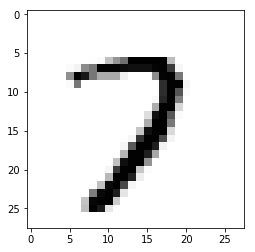

In [20]:
# 내 모델의 정확도를 측정해보고 그림을 그려서 확인해봅시다. 

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))


r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
#이건 CNN, neural network이고 딥러닝 분야 많음. 모두를 위한 딥러닝 추천.